In [11]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np

In [12]:
vini=datasets.load_wine()
print(vini.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
X = vini.data
y = vini.target
caratt=vini.feature_names
qual=vini.target_names
print(caratt)
print(qual)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


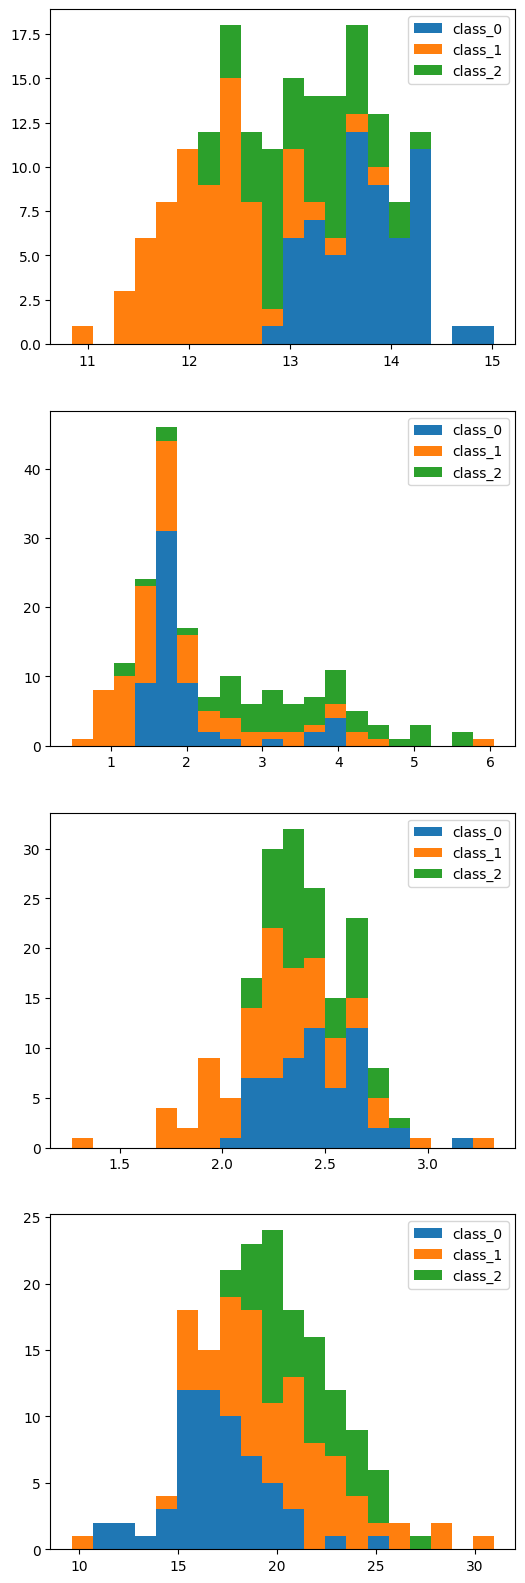

In [4]:
def trova_bin(x):
    m=min(x)
    M=max(x)
    dx=M-m
    return np.linspace(m-dx/20, M+dx/20,21)
    
fig, axs=plt.subplots(nrows=4, figsize=(6,20))
colori=['red','green','blue']
for i in range(4):
    xi=X[:,i]
    bins=trova_bin(xi)
    xic=[xi[y==qi] for qi in range(3)]
    axs[i].hist(xic, bins=bins, label=qual, stacked=True)
    axs[i].legend()
    

In [5]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.1, shuffle=True)

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(Xtrain, ytrain)
xt=lda.transform(Xtrain)

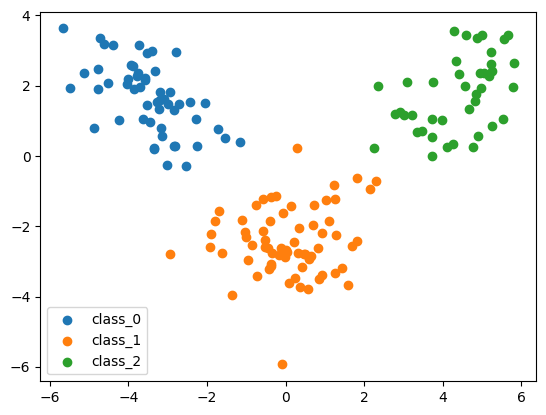

In [7]:
for i in range(3):
    plt.scatter(xt[:,0][ytrain==i], xt[:,1][ytrain==i], label=qual[i])
plt.legend()

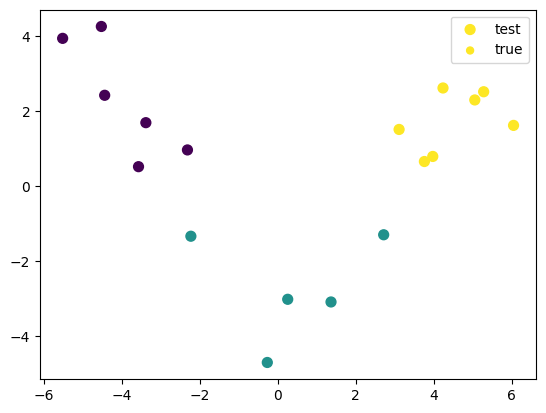

In [10]:
yp=lda.predict(Xtest)
xt=lda.transform(Xtest)
plt.scatter(xt[:,0], xt[:,1], s=50, c=ytest, label="test")
plt.scatter(xt[:,0], xt[:,1], s=25, c=yp, label="true")
plt.legend()

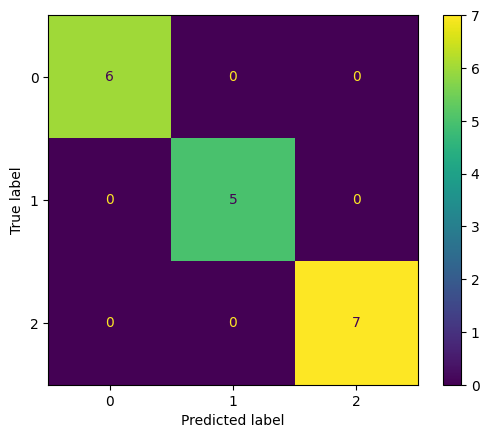

In [9]:
#metrics.plot_confusion_matrix(lda, Xtest, ytest)
metrics.ConfusionMatrixDisplay.from_predictions(ytest,yp)